# Explore Integrated People with Air Theme 1
Look at ANOVAs and descriptive statistics for joined data

## Description of Program
- program:    ip1_3bv1_peopleair
- task:       Explore integrated people and air data
- Version:    2025-12-19
- project:    Southeast Texas Urban Integrated Field Lab
- funding:	  DOE
- author:     Nathanael Rosenheim

## Step 0: Good Housekeeping

In [1]:
# 1. Import all packages
import pandas as pd     # For obtaining and cleaning tabular data
import geopandas as gpd # For obtaining and cleaning spatial data
import matplotlib.pyplot as plt # For plotting
import contextily as ctx # For adding basemaps
import numpy as np
from scipy import stats
import os # For saving output to path
import zipfile # For handling zip files
import io # For handling in-memory data
import requests # For downloading data
import rasterio # For reading geotiff files

In [2]:
# 2. Check versions
import sys
print("Python Version     ", sys.version)
print("geopandas version: ", gpd.__version__)

Python Version      3.13.9 | packaged by conda-forge | (main, Oct 22 2025, 23:12:41) [MSC v.1944 64 bit (AMD64)]
geopandas version:  1.1.1


In [3]:
# 3. Check working directory
# Get information on current working directory (getcwd)
os.getcwd()

'c:\\Users\\nathanael99\\MyProjects\\GitHub\\integrate_people_theme1_cookbook'

In [4]:
#4. Store Program Name for output files to have the same name
programname = "ip1_3bv2_peopleair"
# Make directory to save output
if not os.path.exists(programname):
    os.mkdir(programname)

In [31]:
# Auto-reload modules when they change (useful during development)
%reload_ext autoreload
%autoreload 2

# read in functions from ip1_3bv1_peopleair.py
from ip1_3bv1_peopleair import *

# Step 1: Obtain Data
Obtain data from clean data step

In [6]:
# read in cleaned air data from ip1_2av1_convertairtocsv
source_programname = "ip1_2av1_joinpeopleair"
source_filename = f"{source_programname}.csv"

hua_ari_df = pd.read_csv(os.path.join(source_programname, source_filename))


C:\Users\nathanael99\AppData\Local\Temp\ipykernel_21644\2341540361.py:5: DtypeWarning: Columns (20,23,32) have mixed types. Specify dtype option on import or set low_memory=False.
  hua_ari_df = pd.read_csv(os.path.join(source_programname, source_filename))


In [7]:
hua_ari_df.head(1)

,huid,Block2020,blockid,bgid,tractid,FIPScounty,numprec,ownershp,race,hispan,...,uifl_4km_Xylenes_p98,uifl_4km_Xylenes_mean,uifl_4km_Xylenes_p75,uifl_4km_Xylenes_p25,uifl_4km_Xylenes_p90,uifl_4km_Xylenes_p95,Household Income Group,Tenure Status,Low Income Renter Status,Race Ethnicity
0,B481990302002008H002,481990302002008,481990302002008,481990302002,48199030200,48199.0,0.0,NaN,NaN,NaN,...,0.061573,0.011893,0.015375,0.001948,0.029066,0.04408,NaN,NaN,NaN,NaN


# Step 2: Clean Data

# Step 3: Explore Data

In [22]:
# Compare multiple species across percentiles (matched cases only, quiet)
species_list = ['Benzene','Styrene','Ethylene Oxide']  # Add more species as available in your data
percentile_list = ['p25','p50','p75','p90','p95','p99','p100']
results_multi_species = compare_resolution_anova(
    hua_ari_df, species_list, percentiles=percentile_list, 
    matched_cases_only=True, verbose=True)


=== MULTI-SPECIES RESOLUTION COMPARISON ANALYSIS ===
Species: ['Benzene', 'Styrene', 'Ethylene Oxide']
Analysis type: Matched cases
Percentiles: ['p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'p100']
Note: Zero values excluded as they represent areas outside the pollution model domain

PROCESSING SPECIES: BENZENE

ANALYSIS - BENZENE P25 1KM vs 4KM RESOLUTION
Sample: 147,237 matched housing units

--- Descriptive Statistics for Benzene p25 by Resolution ---
1km Resolution (n=147,237):
  Mean: 0.0101 ppb
  Std:  0.0036 ppb
4km Resolution (n=147,237):
  Mean: 0.0116 ppb
  Std:  0.0050 ppb

--- Statistical Results ---
ANOVA F-statistic: 8543.0949, p-value: 0.000000
Cohen's d: -0.3407 (small)
Cohen's d 95% CI: [-0.3514, -0.3304]
Levene's p-value: 0.000000 (Unequal variances)
Welch's t-test p-value: 0.000000
Result: Significant difference (p < 0.05)
Direction: 4km > 1km

ANALYSIS - BENZENE P50 1KM vs 4KM RESOLUTION
Sample: 147,237 matched housing units

--- Descriptive Statistics for Benzene p5

In [23]:
results_multi_species.head(10)

,species,percentile,matched_cases,n_1km,n_4km,mean_1km,mean_4km,f_statistic,p_value,cohens_d,ci_low,ci_high,effect_size,welch_p
0,Benzene,p25,True,147237,147237,0.010138,0.011617,8543.094894,0.000000e+00,-0.340655,-0.351358,-0.330407,small,0.000000e+00
1,Benzene,p50,True,147237,147237,0.021081,0.023051,5993.065244,0.000000e+00,-0.285319,-0.294323,-0.276361,small,0.000000e+00
2,Benzene,p75,True,147237,147237,0.042096,0.044300,2496.891657,0.000000e+00,-0.184165,-0.191922,-0.176889,negligible,0.000000e+00
3,Benzene,p90,True,147237,147237,0.074879,0.075339,39.366205,3.518109e-10,-0.023124,-0.030400,-0.016335,negligible,3.518126e-10
4,Benzene,p95,True,147237,147237,0.102914,0.100357,734.411131,1.556345e-161,0.099879,0.092628,0.106833,negligible,1.560116e-161
5,Benzene,p99,True,147237,147237,0.174829,0.162740,8719.774437,0.000000e+00,0.344159,0.337152,0.351092,small,0.000000e+00
6,Benzene,p100,True,147237,147237,0.594253,0.573318,125.905815,3.268655e-29,0.041355,0.035344,0.047339,negligible,3.278076e-29
7,Styrene,p25,True,147237,147237,0.000411,0.000524,439.964589,1.299498e-97,-0.077306,-0.092339,-0.064221,negligible,1.331789e-97
8,Styrene,p50,True,147237,147237,0.001537,0.001867,800.772411,6.319965e-176,-0.104294,-0.115734,-0.093123,negligible,6.375728e-176
9,Styrene,p75,True,147237,147237,0.004443,0.005198,805.234595,6.810802e-177,-0.104585,-0.113355,-0.095000,negligible,6.814116e-177


In [25]:
# Compare ownership groups for Benzene at 1km resolution
species_list = ['Benzene','Styrene','Ethylene Oxide']  # Add more species as available in your data
percentile_list = ['p25','p50','p75','p90','p95','p99','p100']
results_ownership_1km = compare_groupby_anova(
    hua_ari_df, species_list, percentiles=percentile_list, 
    groupby_variable='ownershp', resolution='1km', 
    matched_cases_only=True, verbose=True
)


=== MULTI-SPECIES GROUPBY COMPARISON ANALYSIS ===
Species: ['Benzene', 'Styrene', 'Ethylene Oxide']
Resolution: 1km
Groupby variable: ownershp
Analysis type: Matched cases
Percentiles: ['p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'p100']
Note: Zero values excluded as they represent areas outside the pollution model domain
Group values found: [np.float64(1.0), np.float64(2.0)]

PROCESSING SPECIES: BENZENE

ANALYSIS - BENZENE P25 1KM
Comparing ownershp: 1.0 vs 2.0
Sample: Group 1.0: 83,166, Group 2.0: 46,486 housing units

--- Descriptive Statistics for Benzene p25 by ownershp ---
Group 1.0 (n=83,166):
  Mean: 0.0100 ppb
  Std:  0.0038 ppb
Group 2.0 (n=46,486):
  Mean: 0.0104 ppb
  Std:  0.0031 ppb

--- Statistical Results ---
ANOVA F-statistic: 442.5093, p-value: 0.000000
Cohen's d: -0.1218 (negligible)
Cohen's d 95% CI: [-0.1359, -0.1082]
Levene's p-value: 0.000000 (Unequal variances)
Welch's t-test p-value: 0.000000
Result: Significant difference (p < 0.05)
Direction: Group 2.0 > Group

In [26]:
results_ownership_1km.head(10)

,species,percentile,resolution,groupby_variable,matched_cases,group1,group2,n_group1,n_group2,mean_group1,mean_group2,f_statistic,p_value,cohens_d,ci_low,ci_high,effect_size,welch_p
0,Benzene,p25,1km,ownershp,True,1.0,2.0,83166,46486,0.009951,0.010380,442.509255,4.494570e-98,-0.121819,-0.135857,-0.108248,negligible,9.036207e-110
1,Benzene,p50,1km,ownershp,True,1.0,2.0,83166,46486,0.020657,0.021653,869.602527,1.705697e-190,-0.170772,-0.185135,-0.156738,negligible,1.627273e-207
2,Benzene,p75,1km,ownershp,True,1.0,2.0,83166,46486,0.041253,0.043218,1016.505752,3.381019e-222,-0.184634,-0.197558,-0.171384,negligible,NaN
3,Benzene,p90,1km,ownershp,True,1.0,2.0,83166,46486,0.073374,0.076868,1013.796961,1.297950e-221,-0.184387,-0.196324,-0.172689,negligible,4.930242e-228
4,Benzene,p95,1km,ownershp,True,1.0,2.0,83166,46486,0.100866,0.105576,972.675783,9.630010e-213,-0.180609,-0.192281,-0.168772,negligible,6.627973e-218
5,Benzene,p99,1km,ownershp,True,1.0,2.0,83166,46486,0.172521,0.177602,489.897781,2.384250e-108,-0.128176,-0.139720,-0.116924,negligible,2.155806e-111
6,Benzene,p100,1km,ownershp,True,1.0,2.0,83166,46486,0.610485,0.568214,140.658081,1.986553e-32,0.068681,0.057238,0.079749,negligible,3.810798e-34
7,Styrene,p25,1km,ownershp,True,1.0,2.0,83166,46486,0.000403,0.000417,2.408762,1.206602e-01,-0.008988,-0.020751,0.000318,negligible,6.670517e-02
8,Styrene,p50,1km,ownershp,True,1.0,2.0,83166,46486,0.001510,0.001594,20.431514,6.185821e-06,-0.026176,-0.037862,-0.015621,negligible,5.037609e-07
9,Styrene,p75,1km,ownershp,True,1.0,2.0,83166,46486,0.004406,0.004555,12.599549,3.859762e-04,-0.020556,-0.031549,-0.010616,negligible,1.178260e-04


In [28]:
# Compare ownership groups for Benzene at 1km resolution
species_list = ['Benzene','Styrene','Ethylene Oxide']  # Add more species as available in your data
percentile_list = ['p25','p50','p75','p90','p95','p99','p100']
results_ownership_4km = compare_groupby_anova(
    hua_ari_df, species_list, percentiles=percentile_list, 
    groupby_variable='ownershp', resolution='4km', 
    matched_cases_only=True, verbose=True
)


=== MULTI-SPECIES GROUPBY COMPARISON ANALYSIS ===
Species: ['Benzene', 'Styrene', 'Ethylene Oxide']
Resolution: 4km
Groupby variable: ownershp
Analysis type: Matched cases
Percentiles: ['p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'p100']
Note: Zero values excluded as they represent areas outside the pollution model domain
Group values found: [np.float64(1.0), np.float64(2.0)]

PROCESSING SPECIES: BENZENE

ANALYSIS - BENZENE P25 4KM
Comparing ownershp: 1.0 vs 2.0
Sample: Group 1.0: 113,927, Group 2.0: 54,187 housing units

--- Descriptive Statistics for Benzene p25 by ownershp ---
Group 1.0 (n=113,927):
  Mean: 0.0114 ppb
  Std:  0.0042 ppb
Group 2.0 (n=54,187):
  Mean: 0.0118 ppb
  Std:  0.0047 ppb

--- Statistical Results ---
ANOVA F-statistic: 444.4506, p-value: 0.000000
Cohen's d: -0.1100 (negligible)
Cohen's d 95% CI: [-0.1202, -0.0991]
Levene's p-value: 0.000000 (Unequal variances)
Welch's t-test p-value: 0.000000
Result: Significant difference (p < 0.05)
Direction: Group 2.0 > Gro

In [36]:
results_ownership_4km.head(5)

,species,percentile,resolution,groupby_variable,matched_cases,group1,group2,n_group1,n_group2,mean_group1,mean_group2,f_statistic,p_value,cohens_d,ci_low,ci_high,effect_size,welch_p
0,Benzene,p25,4km,ownershp,True,1.0,2.0,113927,54187,0.011367,0.011848,444.450623,1.562268e-98,-0.110015,-0.120204,-0.099101,negligible,1.110355e-91
1,Benzene,p50,4km,ownershp,True,1.0,2.0,113927,54187,0.022094,0.023334,1209.084972,5.650495e-264,-0.181455,-0.191763,-0.170363,negligible,4.567077e-241
2,Benzene,p75,4km,ownershp,True,1.0,2.0,113927,54187,0.041353,0.044248,2222.548966,0.000000e+00,-0.246018,-0.256662,-0.234696,small,0.000000e+00
3,Benzene,p90,4km,ownershp,True,1.0,2.0,113927,54187,0.069975,0.074898,2465.964167,0.000000e+00,-0.259140,-0.269798,-0.248046,small,0.000000e+00
4,Benzene,p95,4km,ownershp,True,1.0,2.0,113927,54187,0.094912,0.100473,2010.433157,0.000000e+00,-0.233984,-0.244456,-0.223076,small,0.000000e+00


In [37]:
# describe variable Low Income Renter Status
hua_ari_df['Low Income Renter Status'].describe()

count                    168114
unique                        2
top       Not Low Income Renter
freq                     136545
Name: Low Income Renter Status, dtype: object

In [39]:
# Compare ownership groups for Benzene at 1km resolution
species_list = ['Benzene','Styrene','Ethylene Oxide']  # Add more species as available in your data
percentile_list = ['p25','p50','p75','p90','p95','p99','p100']
results_lowrenter_1km = compare_groupby_anova(
    hua_ari_df, species_list, percentiles=percentile_list, 
    groupby_variable='Low Income Renter Status', resolution='1km', 
    matched_cases_only=True, verbose=True
)


=== MULTI-SPECIES GROUPBY COMPARISON ANALYSIS ===
Species: ['Benzene', 'Styrene', 'Ethylene Oxide']
Resolution: 1km
Groupby variable: Low Income Renter Status
Analysis type: Matched cases
Percentiles: ['p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'p100']
Note: Zero values excluded as they represent areas outside the pollution model domain
Group values found: ['Low Income Renter', 'Not Low Income Renter']

PROCESSING SPECIES: BENZENE

ANALYSIS - BENZENE P25 1KM
Comparing Low Income Renter Status: Low Income Renter vs Not Low Income Renter
Sample: Group Low Income Renter: 27,108, Group Not Low Income Renter: 102,544 housing units

--- Descriptive Statistics for Benzene p25 by Low Income Renter Status ---
Group Low Income Renter (n=27,108):
  Mean: 0.0104 ppb
  Std:  0.0027 ppb
Group Not Low Income Renter (n=102,544):
  Mean: 0.0100 ppb
  Std:  0.0037 ppb

--- Statistical Results ---
ANOVA F-statistic: 278.5697, p-value: 0.000000
Cohen's d: 0.1140 (negligible)
Cohen's d 95% CI: [0.0999, 0.1

In [45]:
# Compare ownership groups for Benzene at 1km resolution
species_list = ['Benzene','Styrene','Ethylene Oxide']  # Add more species as available in your data
percentile_list = ['p25','p50','p75','p90','p95','p99','p100']
results_lowrenter_4km = compare_groupby_anova(
    hua_ari_df, species_list, percentiles=percentile_list, 
    groupby_variable='Low Income Renter Status', resolution='4km', 
    matched_cases_only=True, verbose=False
)

In [46]:
results_lowrenter_4km.head(5)

,species,percentile,resolution,groupby_variable,matched_cases,group1,group2,n_group1,n_group2,mean_group1,mean_group2,f_statistic,p_value,cohens_d,ci_low,ci_high,effect_size,welch_p
0,Benzene,p25,4km,Low Income Renter Status,True,Low Income Renter,Not Low Income Renter,31569,136545,0.011930,0.011427,338.309004,1.767655e-75,0.114866,0.101214,0.128668,negligible,8.292526e-62
1,Benzene,p50,4km,Low Income Renter Status,True,Low Income Renter,Not Low Income Renter,31569,136545,0.023542,0.022251,912.378351,6.883252e-200,0.188634,0.174829,0.202785,negligible,6.129515e-159
2,Benzene,p75,4km,Low Income Renter Status,True,Low Income Renter,Not Low Income Renter,31569,136545,0.044688,0.041731,1612.523109,0.000000e+00,0.250776,0.236885,0.265031,small,5.550401e-276
3,Benzene,p90,4km,Low Income Renter Status,True,Low Income Renter,Not Low Income Renter,31569,136545,0.075730,0.070598,1863.900707,0.000000e+00,0.269616,0.256148,0.283891,small,0.000000e+00
4,Benzene,p95,4km,Low Income Renter Status,True,Low Income Renter,Not Low Income Renter,31569,136545,0.101702,0.095549,1715.714044,0.000000e+00,0.258676,0.245796,0.272144,small,0.000000e+00


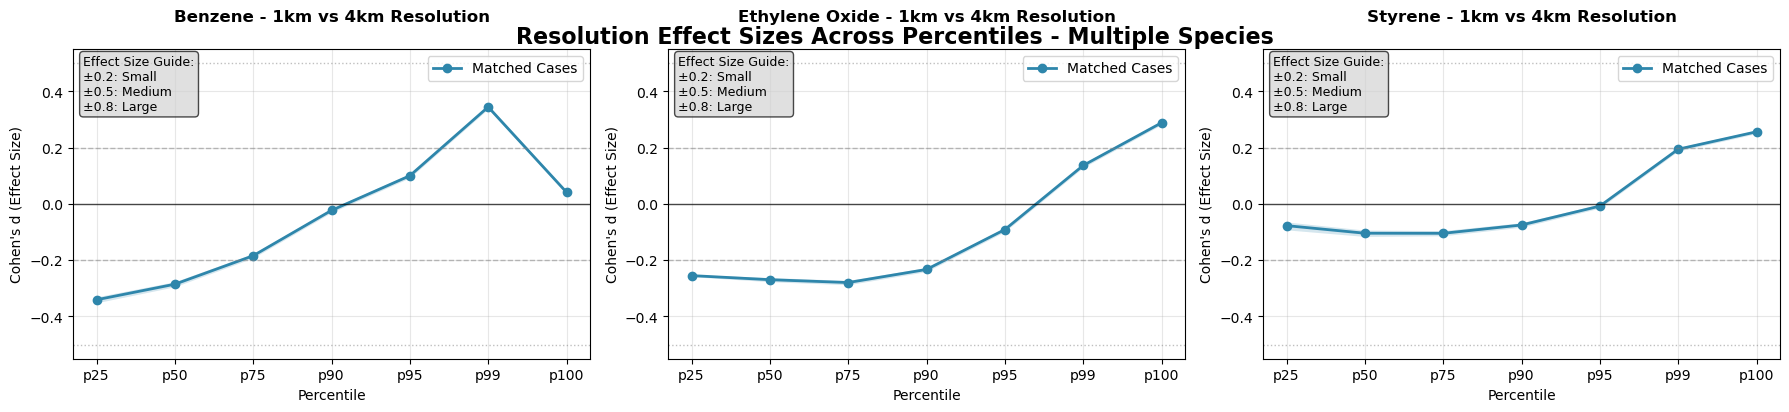

Effect size plot saved to: ip1_3bv2_peopleair\ip1_3bv2_peopleair_benzene_ethylene_oxide_styrene_effect_sizes_by_percentile.png


In [32]:
# Create the effect size plot using both DataFrames
fig_effect_sizes = plot_effect_sizes_by_percentile(
    results_multi_species, 
    programname=programname,
    title_description = "1km vs 4km Resolution",
    save_plot=True
)

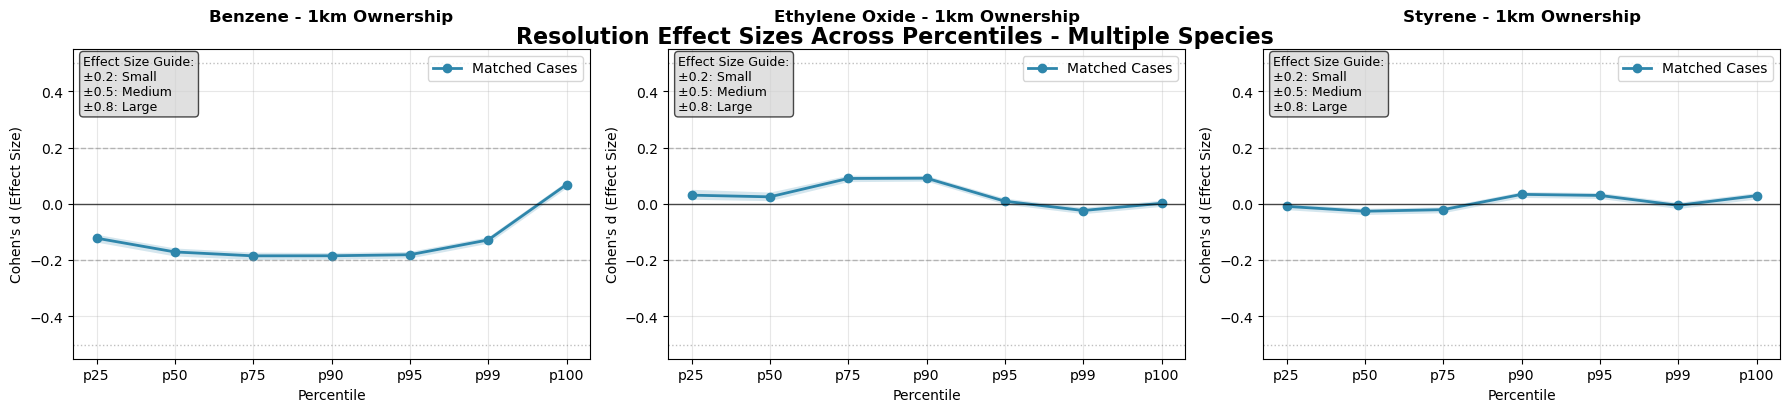

Effect size plot saved to: ip1_3bv2_peopleair\ip1_3bv2_peopleair_benzene_ethylene_oxide_styrene_effect_sizes_by_percentile.png


In [33]:
# Create the effect size plot using both DataFrames
fig_effect_sizes = plot_effect_sizes_by_percentile(
    results_ownership_1km, 
    programname=programname,
    title_description = "1km Ownership",
    save_plot=True
)

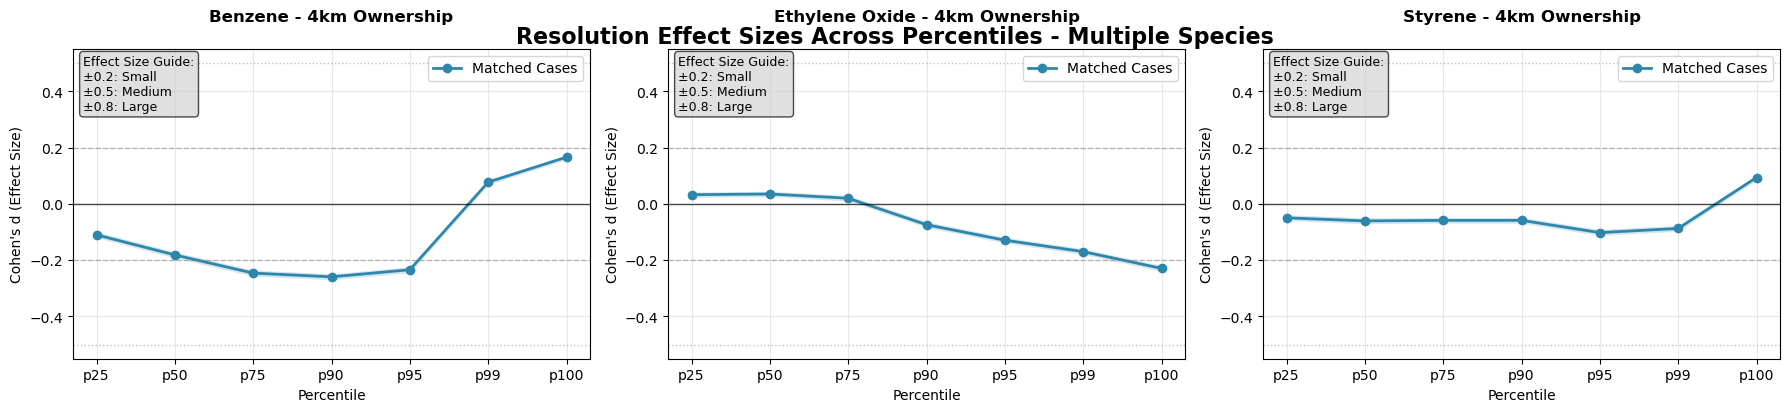

Effect size plot saved to: ip1_3bv2_peopleair\ip1_3bv2_peopleair_benzene_ethylene_oxide_styrene_effect_sizes_by_percentile.png


In [34]:
# Create the effect size plot using both DataFrames
fig_effect_sizes = plot_effect_sizes_by_percentile(
    results_ownership_4km, 
    programname=programname,
    title_description = "4km Ownership",
    save_plot=True
)

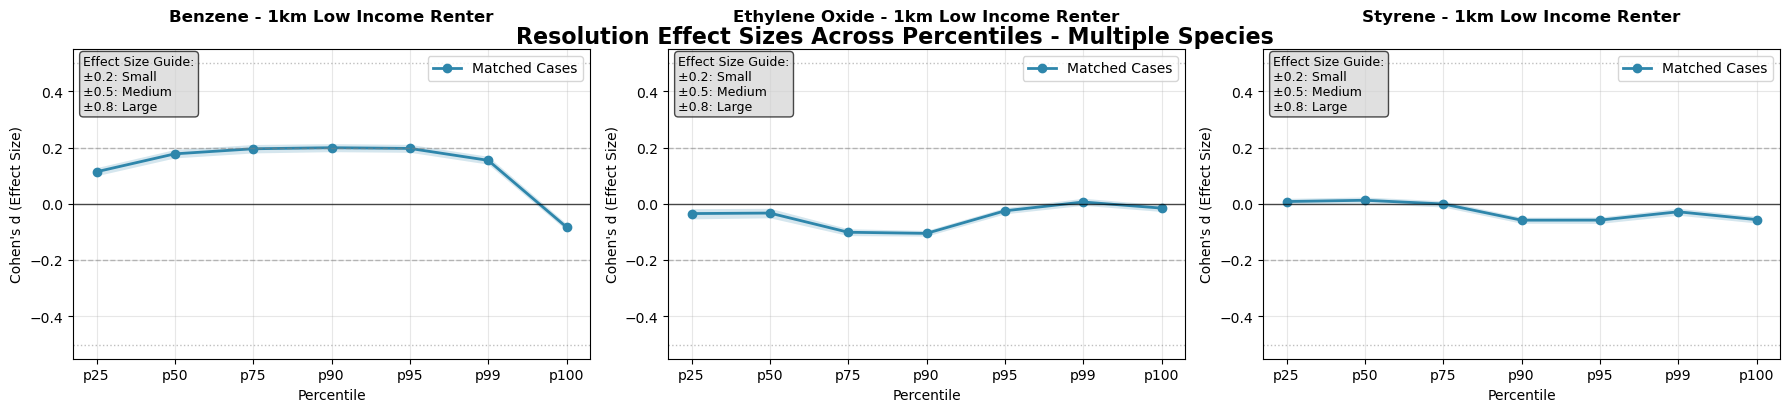

Effect size plot saved to: ip1_3bv2_peopleair\ip1_3bv2_peopleair_benzene_ethylene_oxide_styrene_effect_sizes_by_percentile.png


In [43]:
# Create the effect size plot using both DataFrames
fig_effect_sizes = plot_effect_sizes_by_percentile(
    results_lowrenter_1km, 
    programname=programname,
    title_description = "1km Low Income Renter",
    save_plot=True
)

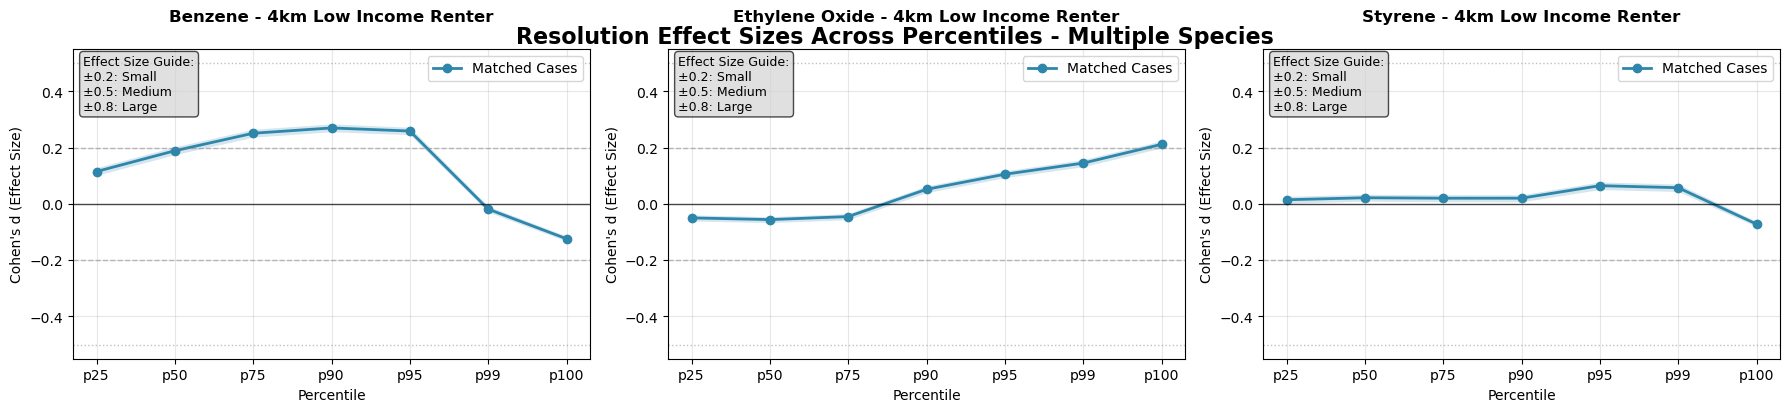

Effect size plot saved to: ip1_3bv2_peopleair\ip1_3bv2_peopleair_benzene_ethylene_oxide_styrene_effect_sizes_by_percentile.png


In [47]:
# Create the effect size plot using both DataFrames
fig_effect_sizes = plot_effect_sizes_by_percentile(
    results_lowrenter_4km, 
    programname=programname,
    title_description = "4km Low Income Renter",
    save_plot=True
)

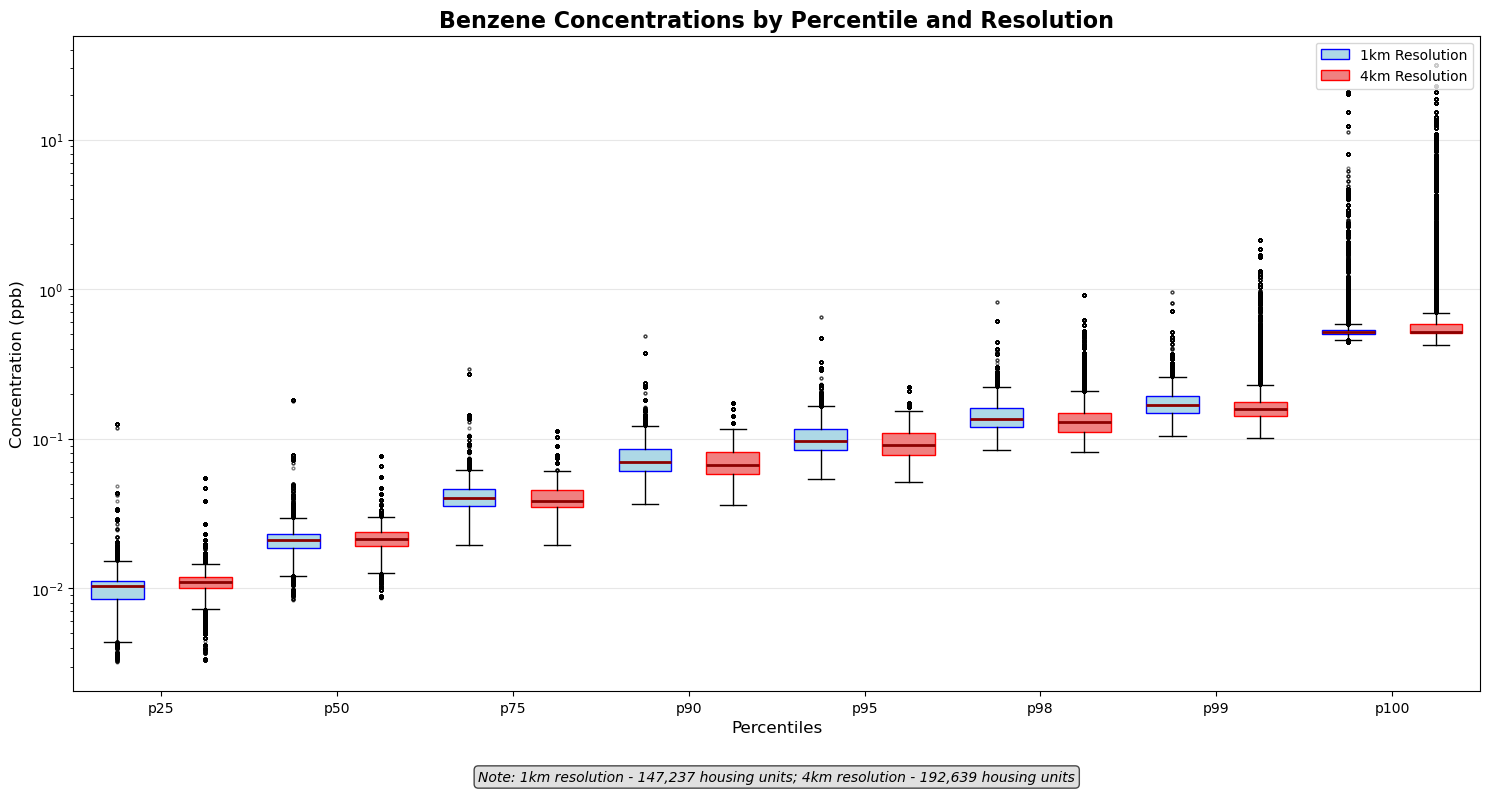

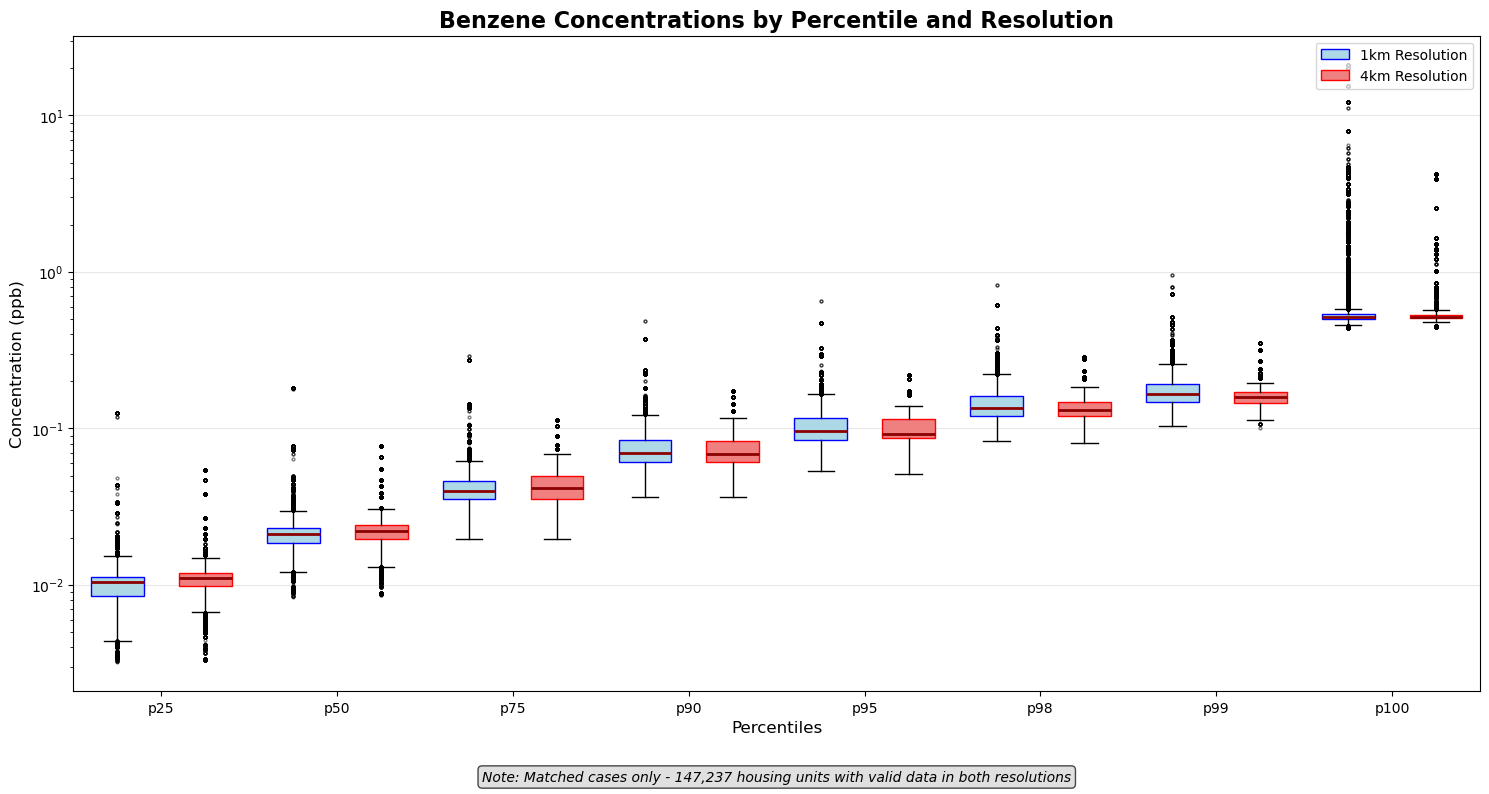

In [19]:

# Example usage: Create plot for Benzene (all available data)
fig_benzene = create_species_percentiles_comparison_plot(
    hua_ari_df, 'Benzene', programname, save_plot=True
)

# Example usage: Create plot for Benzene (matched cases only)
fig_benzene_matched = create_species_percentiles_comparison_plot(
    hua_ari_df, 'Benzene', programname, save_plot=True, matched_cases_only=True
)


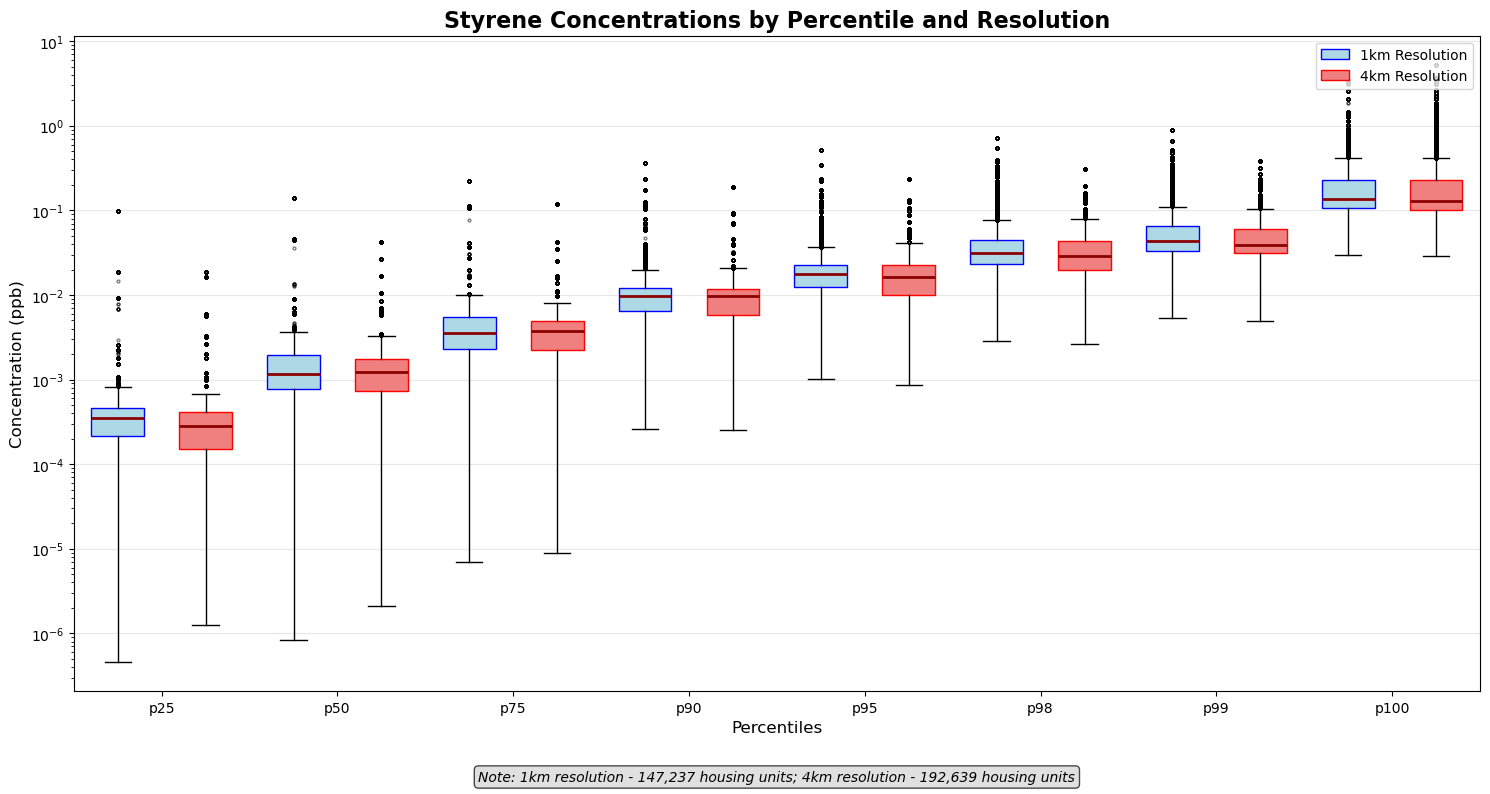

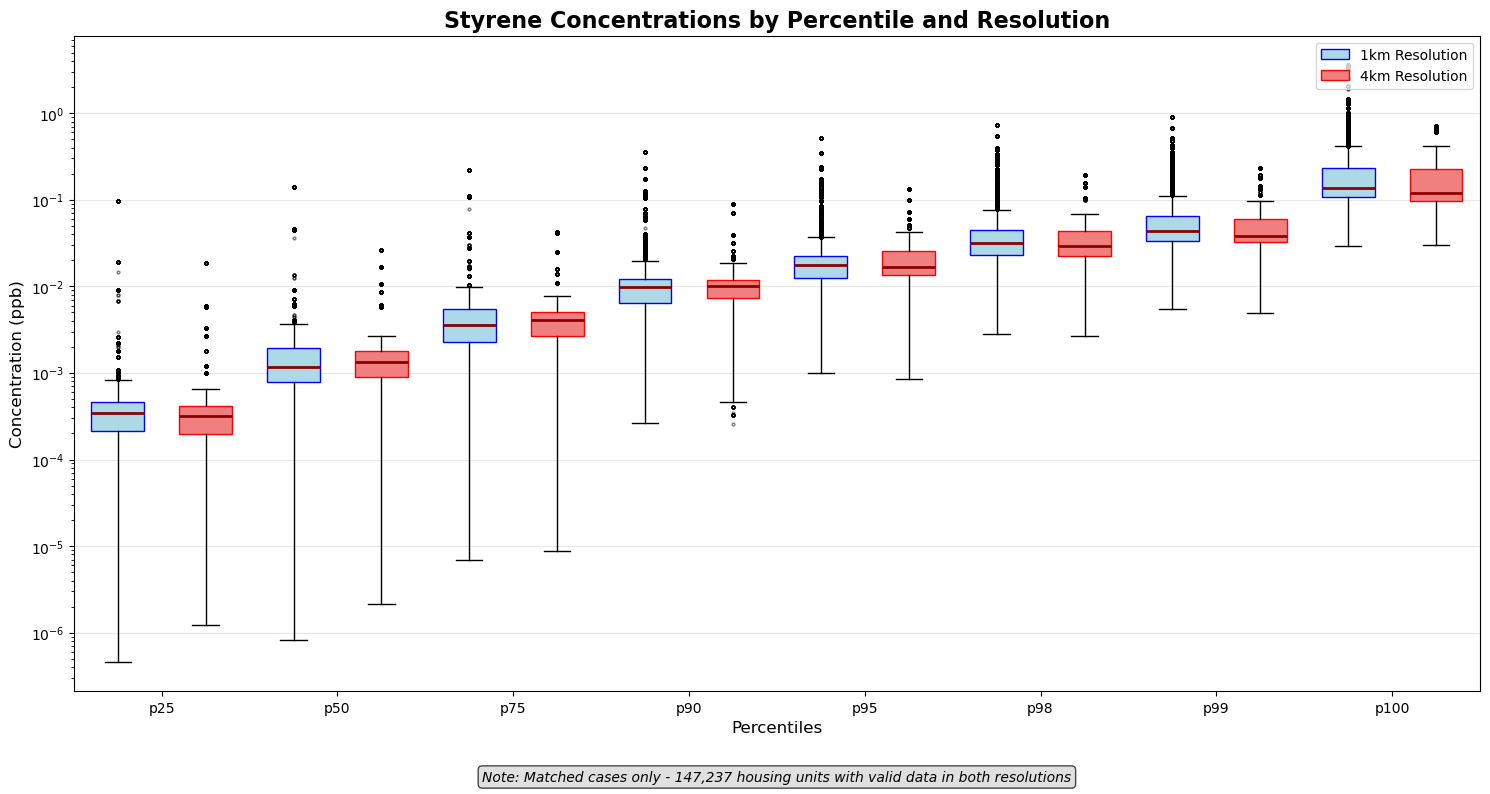

In [20]:
# Example usage: Create plot for Benzene (all available data)
fig_styrene = create_species_percentiles_comparison_plot(
    hua_ari_df, 'Styrene', programname, save_plot=True
)

# Example usage: Create plot for Benzene (matched cases only)
fig_styrene_matched = create_species_percentiles_comparison_plot(
    hua_ari_df, 'Styrene', programname, save_plot=True, matched_cases_only=True
)

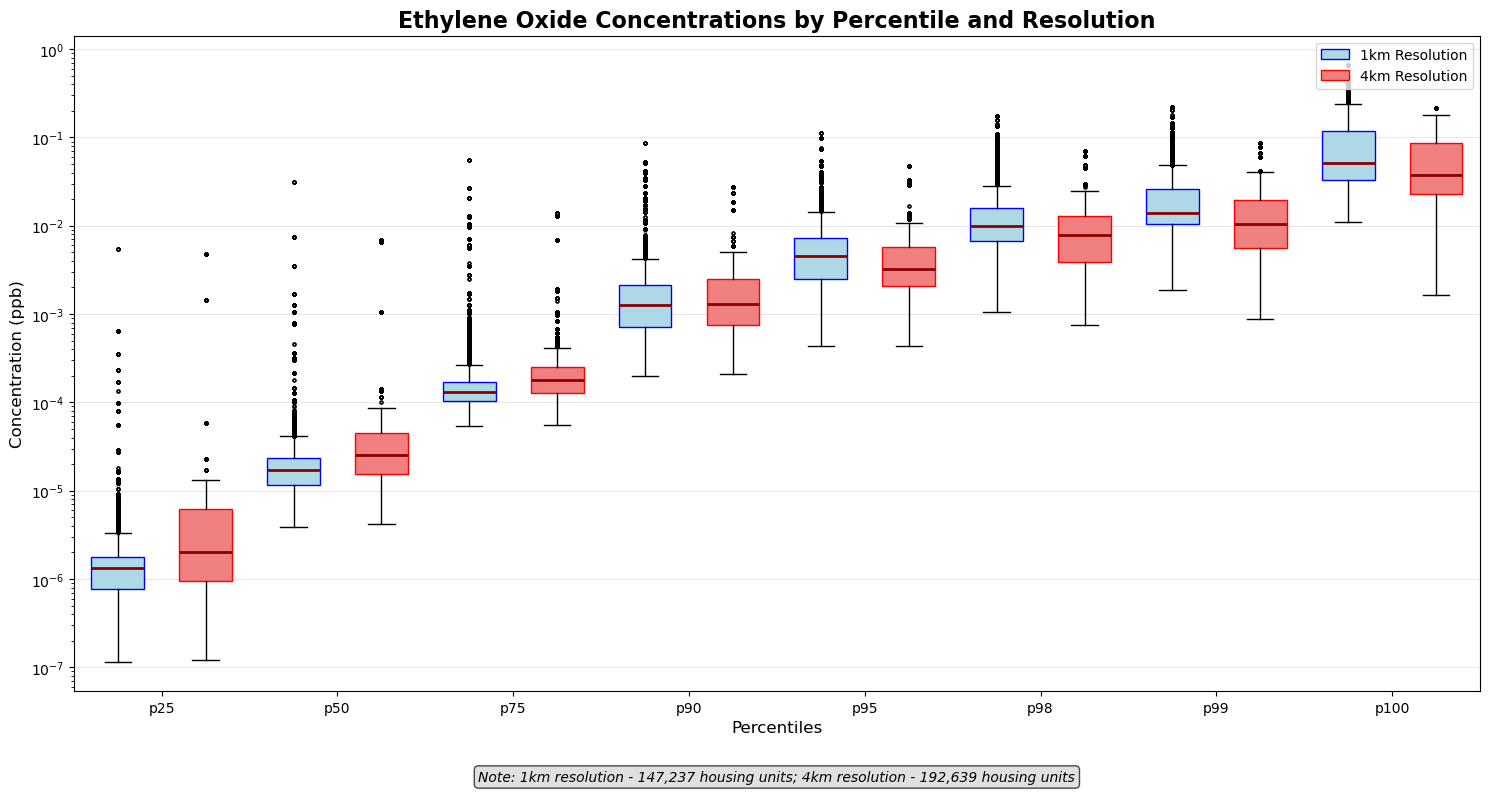

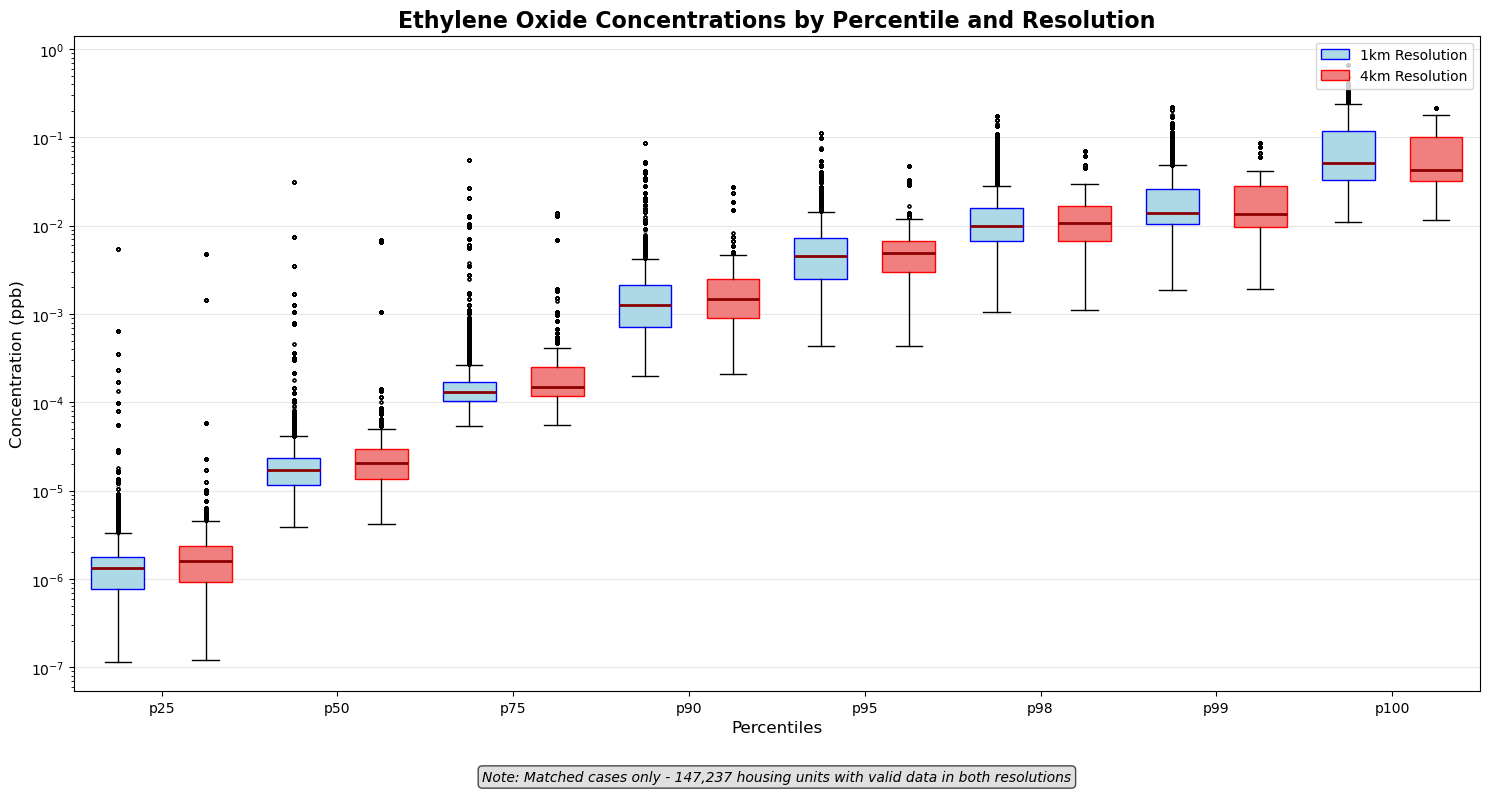

In [21]:
# Example usage: Create plot for Benzene (all available data)
fig_ethylene_oxide = create_species_percentiles_comparison_plot(
    hua_ari_df, 'Ethylene Oxide', programname, save_plot=True
)

# Example usage: Create plot for Benzene (matched cases only)
fig_ethylene_oxide_matched = create_species_percentiles_comparison_plot(
    hua_ari_df, 'Ethylene Oxide', programname, save_plot=True, matched_cases_only=True
)

Summary of methods from MS Copilot Auto LLM selection

### Version 1: Academic Journal Audience
#### Title: Assessing Ownership-Based Disparities in Air Pollution Exposure Across Distributional Percentiles
#### Summary:
To evaluate whether disparities in air pollution exposure between owner-occupied and renter-occupied housing units vary across the exposure distribution, we computed standardized mean differences (Cohen’s d) at multiple percentiles (p25, p50, p75, p90) of modeled benzene concentrations. This approach moves beyond a single summary statistic (e.g., mean or p90) to capture potential heterogeneity in disparities at higher exposure levels, which are often more relevant for health risk assessment. Effect sizes were plotted against percentiles to visualize trends, providing insight into whether ownership-related differences amplify in the upper tail of the distribution. This method complements traditional ANOVA by emphasizing practical significance and distributional equity rather than relying solely on p-values, which can be misleading in large samples.

### Version 2: Community Decision Makers (No Statistical Background)
#### Title: Looking at Pollution Differences Where It Matters Most
#### Summary:
Instead of just comparing average pollution levels between homeowners and renters, we looked at different points in the pollution range—from typical levels to the highest levels people experience. This helps us see if renters face bigger differences when pollution is at its worst. We measured the size of the gap at each point and made a simple chart showing whether the gap grows as pollution gets higher. This approach focuses on real-world impact: even if overall differences are small, renters might still be more exposed in the most polluted areas, which is important for health and fairness.